# "Shut the Box" Game

### Imports

In [3]:
from datascience import *
import matplotlib.pyplot as plots
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
plots.style.use('fivethirtyeight')
import numpy as np
import math

## How the game works

- There is a box with 9 dominoes, numbered 1 to 9
- You roll dice two at a time to get a number, and you have to knock down dominoes that add up to that number
    - e.g. 9, you can put down a 9, or put down a 5 and a 4, an 8 and a 1, etc. 
- You must roll both dice unless the total sum of the dominoes remaining up is less than or equal to 6, when you can roll just 1
- To win, you must knock down all the dominoes
    - Another way to play is to try to get the lowest "score" possible
    - Your score is the sum of the remaining dominoes standing when you lose


- It is not as easy as it sounds, and we will find that your chance of winning is very low
- For example, if only the 5 remains, you must roll exactly that, a 1/6 chance of surviving just on that roll

In [16]:
# A FUNCTION TO ROLL DICE FOR US

def shutter_rolls(number):
    '''simulates n rolls'''
    rolls = make_array()
    for i in np.arange(number):
        roll_one = np.random.choice(np.arange(1,7))
        roll_two = np.random.choice(np.arange(1,7))
        roll = roll_one + roll_two
        rolls = np.append(rolls,roll)
    rolls_table = Table().with_column('Roll', rolls)
    return rolls_table

In [17]:
# MAKE TABLE OF DISTRIBUTION

total_rolls = shutter_rolls(10000)
grouped_rolls = total_rolls.group('Roll')
grouped_rolls.show(3)

Roll,count
2,277
3,545
4,822


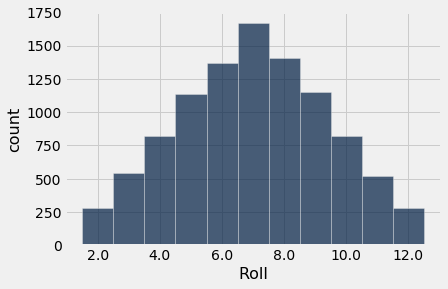

In [18]:
# GRAPH DISTRIBUTION OF DICE ROLLS

grouped_rolls.bar('Roll')

In [19]:
#DEFINING THE BOX FOR THE GAME

shut_box = [1,2,3,4,5,6,7,8,9]

In [20]:
# WE WILL CALL IT "FULL"

full = [1,2,3,4,5,6,7,8,9]

## Playing the Game

- The game is mainly luck
- But there are actually a good amount of decisions to make
- Instead of making an AI that "learns", I gave the program explicit, brute force instructions

In [26]:
#FUNCTION TO FIND THE BEST ROLL

def best_roll(box):
    
    '''finds the best roll given the current state of any box, returns box after roll'''
    
    biggest = max(box)
    smallest = min(box)
    
    if sum(box) > 6:
        roll = np.random.choice(np.arange(1,7)) + np.random.choice(np.arange(1,7)) 
        
    else:
        roll = np.random.choice(np.arange(1,7))
        
    
    if roll in box:
        box.remove(roll)
        if sum(box) == 0:
            return 'Win'
        else:
            return box
    
    elif roll == sum(box):
        return 'Win'
        
    elif roll >= biggest:
        if roll - biggest in box and roll-biggest != biggest:
            box.remove(roll - biggest)
            if biggest in box:
                box.remove(biggest)
                if sum(box) == 0:
                    return 'Win'
                else:
                    return box
            else:
                return 'Lose'
        elif roll - 1 in box and 1 in box and roll-1 != 1:
                    box.remove(roll - 1)
                    box.remove(1)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 2 in box and 2 in box and roll-2 != 2:
                    box.remove(roll - 2)
                    box.remove(2)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 3 in box and 3 in box and roll-3 != 3:
                    box.remove(roll - 3)
                    box.remove(3)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 4 in box and 4 in box and roll-4 != 4:
                    box.remove(roll - 4)
                    box.remove(4)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 5 in box and 5 in box and roll-5 != 5:
                    box.remove(roll - 5)
                    box.remove(5)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 6 in box and 6 in box and roll-6 != 6:
                    box.remove(roll - 6)
                    box.remove(6)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
    
        else:
            return 'Lose'

    else:
        if roll - 1 in box and 1 in box and roll-1 != 1:
                    box.remove(roll - 1)
                    box.remove(1)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 2 in box and 2 in box and roll-2 != 2:
                    box.remove(roll - 2)
                    box.remove(2)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 3 in box and 3 in box and roll-3 != 3:
                    box.remove(roll - 3)
                    box.remove(3)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 4 in box and 4 in box and roll-4 != 4:
                    box.remove(roll - 4)
                    box.remove(4)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 5 in box and 5 in box and roll-5 != 5:
                    box.remove(roll - 5)
                    box.remove(5)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
        elif roll - 6 in box and 6 in box and roll-6 != 6:
                    box.remove(roll - 6)
                    box.remove(6)
                    if sum(box) == 0:
                        return 'Win'
                    else:
                        return box
    
        else:
            return 'Lose'

In [29]:
def play_game():
    
    '''Plays a game of Shut the Box, repeating the best roll function until a result is achieved'''
    '''Returns "Win" or "Lose" and the state of the box before and after each roll'''
    
    box = [1,2,3,4,5,6,7,8,9]
    
    first_roll = best_roll(box)
    print(first_roll)
    
    second_roll = best_roll(first_roll)
    print(second_roll)
    
    if second_roll == 'Lose':
        return 'Lose'
    elif second_roll == 'Win':
        return 'Win'
    else:
        third_roll = best_roll(second_roll)
        print(third_roll)
    
        if third_roll == 'Lose':
            return 'Lose'
        elif third_roll == 'Win':
            return 'Win'
        else:
            fourth_roll = best_roll(third_roll)
            print(fourth_roll)
        
            if fourth_roll == 'Lose':
                return 'Lose'
            elif fourth_roll == 'Win':
                return 'Win'
            else:
                fifth_roll = best_roll(fourth_roll)
                print(fifth_roll)
        
                if fifth_roll == 'Lose':
                    return 'Lose'
                elif fifth_roll == 'Win':
                    return 'Win'
                else:
                    sixth_roll = best_roll(fifth_roll)
                    print(sixth_roll)
        
                    if sixth_roll == 'Lose':
                        return 'Lose'
                    elif sixth_roll == 'Win':
                        return 'Win'
                    else:
                        seventh_roll = best_roll(sixth_roll)
                        print(seventh_roll)
                
                        if seventh_roll == 'Lose':
                            return 'Lose'
                        elif seventh_roll == 'Win':
                            return 'Win'
                        else: 
                            eighth_roll = best_roll(seventh_roll)
                            print(eighth_roll)
                        
                            if eighth_roll == 'Lose':
                                return 'Lose'
                            elif eighth_roll == 'Win':
                                return 'Win'
                            else:
                                ninth_roll = best_roll(eighth_roll)
                                print(ninth_roll)

In [30]:
def get_result():
    
    '''Same function as before, but only prints "Win or Lose" '''
    
    box = [1,2,3,4,5,6,7,8,9]
    
    first_roll = best_roll(box)
    
    
    second_roll = best_roll(first_roll)
    
    
    if second_roll == 'Lose':
        return 'Lose'
    elif second_roll == 'Win':
        return 'Win'
    else:
        third_roll = best_roll(second_roll)
    
        if third_roll == 'Lose':
            return 'Lose'
        elif third_roll == 'Win':
            return 'Win'
        else:
            fourth_roll = best_roll(third_roll)
        
    
            if fourth_roll == 'Lose':
                return 'Lose'
            elif fourth_roll == 'Win':
                return 'Win'
            else:
                fifth_roll = best_roll(fourth_roll)
           
        
                if fifth_roll == 'Lose':
                    return 'Lose'
                elif fifth_roll == 'Win':
                    return 'Win'
                else:
                    sixth_roll = best_roll(fifth_roll)
               
        
                    if sixth_roll == 'Lose':
                        return 'Lose'
                    elif sixth_roll == 'Win':
                        return 'Win'
                    else:
                        seventh_roll = best_roll(sixth_roll)
                    
                
                        if seventh_roll == 'Lose':
                            return 'Lose'
                        elif seventh_roll == 'Win':
                            return 'Win'
                        else: 
                            eighth_roll = best_roll(seventh_roll)
                        
                        
                            if eighth_roll == 'Lose':
                                return 'Lose'
                            elif eighth_roll == 'Win':
                                return 'Win'
                            else:
                                ninth_roll = best_roll(eighth_roll)
                                
                                if ninth_roll == 'Lose':
                                    return 'Lose'
                                elif ninth_roll == 'Win':
                                    return 'Win'

In [31]:
def get_score():
    
    '''This function returns the sum of the dominoes remaining after a loss, or 0 if a win'''
    
    box = [1,2,3,4,5,6,7,8,9]
    
    first_roll = best_roll(box)
    
    
    second_roll = best_roll(first_roll)
    
    
    if second_roll == 'Lose':
        return sum(first_roll)
    elif second_roll == 'Win':
        return sum(box)
    else:
        third_roll = best_roll(second_roll)
    
        if third_roll == 'Lose':
            return sum(second_roll)
        elif third_roll == 'Win':
            return sum(box)
        else:
            fourth_roll = best_roll(third_roll)
        
    
            if fourth_roll == 'Lose':
                return sum(third_roll)
            elif fourth_roll == 'Win':
                return sum(box)
            else:
                fifth_roll = best_roll(fourth_roll)
           
        
                if fifth_roll == 'Lose':
                    return sum(fourth_roll)
                elif fifth_roll == 'Win':
                    return 0
                else:
                    sixth_roll = best_roll(fifth_roll)
               
        
                    if sixth_roll == 'Lose':
                        return sum(fifth_roll)
                    elif sixth_roll == 'Win':
                        return 0
                    else:
                        seventh_roll = best_roll(sixth_roll)
                    
                
                        if seventh_roll == 'Lose':
                            return sum(sixth_roll)
                        elif seventh_roll == 'Win':
                            return 0
                        else: 
                            eighth_roll = best_roll(seventh_roll)
                        
                        
                            if eighth_roll == 'Lose':
                                return sum(seventh_roll)
                            elif eighth_roll == 'Win':
                                return 0
                            else:
                                ninth_roll = best_roll(eighth_roll)
                                
                                if ninth_roll == 'Lose':
                                    return sum(eighth_roll)
                                elif ninth_roll == 'Win':
                                    return sum(box)

In [44]:
def play_game_and_get_score():
    
    '''This function plays the game, returning "win" or "lose" and giving the score'''
    
    box = [1,2,3,4,5,6,7,8,9]
    
    first_roll = best_roll(box)
    #print(first_roll)
    
    second_roll = best_roll(first_roll)
    #print(second_roll)
    
    if second_roll == 'Lose':
        return sum(first_roll), 'Lose'
    elif second_roll == 'Win':
        return 0, 'Win'
    else:
        third_roll = best_roll(second_roll)
        #print(third_roll)
    
        if third_roll == 'Lose':
            return sum(second_roll), 'Lose'
        elif third_roll == 'Win':
            return 0, 'Win'
        else:
            fourth_roll = best_roll(third_roll)
            #print(fourth_roll)
        
            if fourth_roll == 'Lose':
                return sum(third_roll), 'Lose'
            elif fourth_roll == 'Win':
                return 0, 'Win'
            else:
                fifth_roll = best_roll(fourth_roll)
                #print(fifth_roll)
        
                if fifth_roll == 'Lose':
                    return sum(fourth_roll), 'Lose'
                elif fifth_roll == 'Win':
                    return 0, 'Win'
                else:
                    sixth_roll = best_roll(fifth_roll)
                    #print(sixth_roll)
        
                    if sixth_roll == 'Lose':
                        return sum(fifth_roll), 'Lose'
                    elif sixth_roll == 'Win':
                        return 0, 'Win'
                    else:
                        seventh_roll = best_roll(sixth_roll)
                        #print(seventh_roll)
                
                        if seventh_roll == 'Lose':
                            return sum(sixth_roll), 'Lose'
                        elif seventh_roll == 'Win':
                            return 0, 'Win'
                        else: 
                            eighth_roll = best_roll(seventh_roll)
                            #print(eighth_roll)
                        
                            if eighth_roll == 'Lose':
                                return sum(seventh_roll), 'Lose'
                            elif eighth_roll == 'Win':
                                return 0, 'Win'
                            else:
                                ninth_roll = best_roll(eighth_roll)
                                #print(ninth_roll)
                                
                                if ninth_roll == 'Lose':
                                    return sum(eighth_roll), 'Lose'
                                elif ninth_roll == 'Win':
                                    return 0, 'Win'

In [32]:
best_roll(full)

[3, 4, 5, 6, 7, 8]

In [33]:
play_game()

[2, 3, 4, 5, 6, 7, 8]
[2, 3, 4, 5, 7, 8]
[2, 3, 5, 7, 8]
[2, 3, 7, 8]
[7, 8]
Lose


'Lose'

In [34]:
get_score()

20

In [35]:
get_result()

'Lose'

In [45]:
play_game_and_get_score()

(3, 'Lose')

## Analyzing the Results

- it looks like you have on average about a 9% chance to win this game

In [36]:
def simulate_n_games(n):
    
    '''Returns a table of the amount of wins and losses after n games'''
    
    results = make_array()
    for i in np.arange(n):
        result = get_result()
        results = np.append(results, result)

    result_table = Table().with_columns('Wins',np.count_nonzero(results == 'Win'),'Losses',np.count_nonzero(results == 'Lose'))
    
    return result_table

In [43]:
def simulate_n_scores(n):
    
    '''Returns a table of the amount of games that ended in each score after n games, the average score, and a plot'''
    
    scores = make_array()
    
    for i in np.arange(n):
        score = get_score()
        scores = np.append(scores, score)
        
    score_table = Table().with_column('Score',scores).group('Score')
    score_average = np.mean(scores)
    score_plot = score_table.plot('Score')
    
    return score_table, score_average, score_plot

In [41]:
simulate_n_games(10000)

Wins,Losses
913,9087


(Score | count
 0     | 898
 1     | 214
 2     | 259
 3     | 339
 4     | 347
 5     | 349
 6     | 313
 7     | 428
 8     | 492
 9     | 512
 ... (32 rows omitted), 11.7053, None)

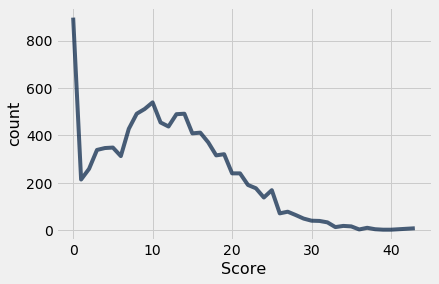

In [42]:
simulate_n_scores(10000)

In [71]:
def simulate_n_games_k_times(n,k):
    
    '''Simulates a set of n games k amount of times'''
    
    results = make_array()
    for i in np.arange(k):
        result = simulate_n_games(n)[0] / n
        results = np.append(results, result)

    result_table = Table().with_column('Wins',results)
    
    return result_table.hist(0)

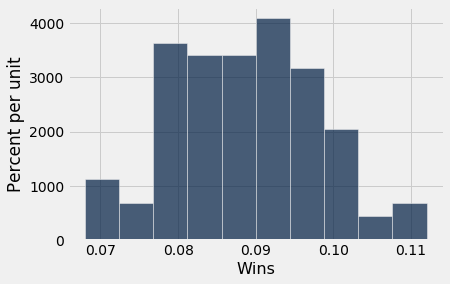

In [75]:
simulate_n_games_k_times(1000,100)

## Making a Payoff Schedule

- This game was often played for money
- Here's a simple payoff schedule good for a casino because everyone loses in the long run

- If you "shut the box" and win, you get 100 dollars
- If you lose, you only lose 10 dollars

In [77]:
def payoff(n):
    
    '''Calculates the payoff after n games'''
    
    results = make_array()
    
    for i in np.arange(n):
        result = get_result()
        results = np.append(results, result)
    
    money = np.count_nonzero(results == 'Win')*100 + np.count_nonzero(results == 'Lose')*-10
    
    return money

In [78]:
def payoff_dist(n,reps):
    
    profits = make_array()
    
    for i in np.arange(reps):
        profit = payoff(n)
        profits = np.append(profits, profit)
    
    average_profit = np.mean(profits)
    profit_table = Table().with_column('Profits',profits).hist('Profits')
    
    return average_profit, profit_table

In [79]:
payoff(1000)

-540

(-330.34, None)

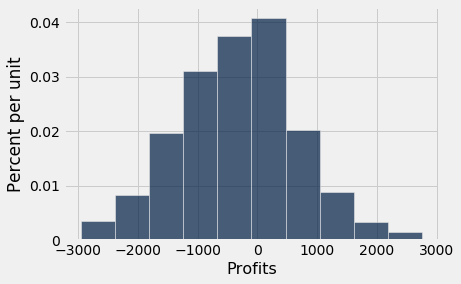

In [81]:
payoff_dist(1000,1000)

## Extra Findings

In [88]:
def play_game_and_get_board():
    
    '''Returns remaining board at the end'''
    
    box = [1,2,3,4,5,6,7,8,9]
    
    first_roll = best_roll(box)
    #print(first_roll)
    
    second_roll = best_roll(first_roll)
    #print(second_roll)
    
    if second_roll == 'Lose':
        return first_roll
    elif second_roll == 'Win':
        return []
    else:
        third_roll = best_roll(second_roll)
        #print(third_roll)
    
        if third_roll == 'Lose':
            return second_roll
        elif third_roll == 'Win':
            return []
        else:
            fourth_roll = best_roll(third_roll)
            #print(fourth_roll)
        
            if fourth_roll == 'Lose':
                return third_roll
            elif fourth_roll == 'Win':
                return []
            else:
                fifth_roll = best_roll(fourth_roll)
                #print(fifth_roll)
        
                if fifth_roll == 'Lose':
                    return fourth_roll
                elif fifth_roll == 'Win':
                    return []
                else:
                    sixth_roll = best_roll(fifth_roll)
                    #print(sixth_roll)
        
                    if sixth_roll == 'Lose':
                        return fifth_roll
                    elif sixth_roll == 'Win':
                        return []
                    else:
                        seventh_roll = best_roll(sixth_roll)
                        #print(seventh_roll)
                
                        if seventh_roll == 'Lose':
                            return sixth_roll
                        elif seventh_roll == 'Win':
                            return []
                        else: 
                            eighth_roll = best_roll(seventh_roll)
                            #print(eighth_roll)
                        
                            if eighth_roll == 'Lose':
                                return seventh_roll
                            elif eighth_roll == 'Win':
                                return []
                            else:
                                ninth_roll = best_roll(eighth_roll)
                                #print(ninth_roll)
                                
                                if ninth_roll == 'Lose':
                                    return eighth_roll
                                elif ninth_roll == 'Win':
                                    return []

In [89]:
play_game_and_get_board()

[5, 8]

In [96]:
def board_dist(reps):
    
    '''Returns the distribution of the numbers remaining at the end of n games'''
    
    boards = []
    
    for i in np.arange(reps):
        board = play_game_and_get_board()
        boards += board
        
    board_table = Table().with_column('Number',boards) 
        
    return board_table.group(0)

In [97]:
board_dist(100)

Number,count
1,17
2,30
3,27
4,39
5,27
6,26
7,28
8,24
9,18


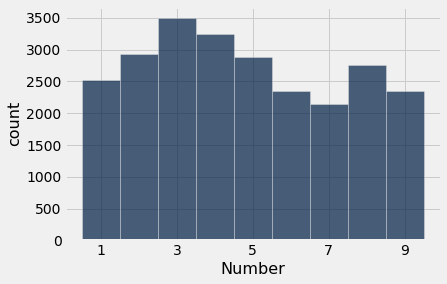

In [99]:
# PLOT THE DISTRIBUTION TO NOTICE TRENDS

board_dist(10000).bar('Number','count')

It looks like **3** is the *most* common number to be left on the board. **7** is the *least* common number left.